In [221]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict

from game_ops import Game, Epoch

In [222]:
style.use('ggplot')
sns.set_style()

In [223]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
def label_it(e_obj): 
    ep = e_obj.epochs_run['0']['epsilon']
    sigs = e_obj.epochs_run['0']['sigmas']
    return f'{ep} with {sigs}'

In [236]:
mus = [2, 4, 6, 8, 10, 15, 20]
epsilon = .1
steps = 1500

In [328]:
df_dict = defaultdict(dict)
optimals_dict = defaultdict(dict)
e_dict = defaultdict(dict)

In [330]:
sigmas_pkg= [[1, 2, 3, 4, 5, 7.5, 10],
             [.1, .1, .1, .1,  .1, .1, .1], 
             [.01, .01, .01, .01, .01, .01, .01], 
             [.001, .001, .001, .001,  .001, .001, .001],
             [.02, .04, .06, .08,  .1, .15, .2]]
epsilons = [.01,.1, .5]

for i, sigmas in enumerate(sigmas_pkg): 
    for epsilon in epsilons: 
        ep = str(epsilon)
        print(f'\nSigmas: {sigmas}, Epsilon: {epsilon}')
        e_obj = Epoch(200, epsilon=epsilon, mus=mus, sigmas=sigmas, steps=steps)
        e_obj.capture_stats()
        df = pd.DataFrame(e_obj.epochs_run['0']['rewards']).T
        optimals = pd.DataFrame(e1.epochs_run['0']['optimals']).T
        df_dict[ep][i] = df
        e_dict[ep][i] = e_obj
        optimals_dict[ep][i] = optimals_dict



Sigmas: [1, 2, 3, 4, 5, 7.5, 10], Epsilon: 0.01
Running Epoch: 199
Sigmas: [1, 2, 3, 4, 5, 7.5, 10], Epsilon: 0.1
Running Epoch: 199
Sigmas: [1, 2, 3, 4, 5, 7.5, 10], Epsilon: 0.5
Running Epoch: 199
Sigmas: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], Epsilon: 0.01
Running Epoch: 199
Sigmas: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], Epsilon: 0.1
Running Epoch: 199
Sigmas: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], Epsilon: 0.5
Running Epoch: 199
Sigmas: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], Epsilon: 0.01
Running Epoch: 199
Sigmas: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], Epsilon: 0.1
Running Epoch: 199
Sigmas: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], Epsilon: 0.5
Running Epoch: 199
Sigmas: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], Epsilon: 0.01
Running Epoch: 199
Sigmas: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], Epsilon: 0.1
Running Epoch: 199
Sigmas: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], Epsilon: 0.5
Running Epoch: 199
Sigmas: [0.02, 0.04, 0.06, 0.08, 0.1, 0.1

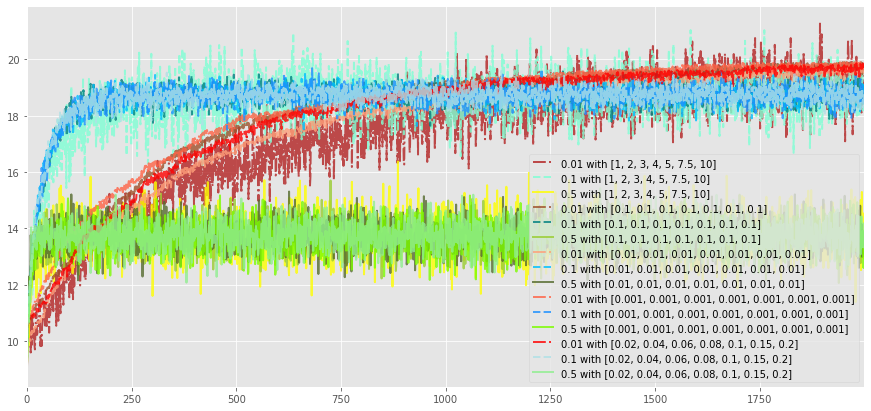

In [332]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(len(sigmas_pkg)): 
    for epsilon in epsilons: 
        ep = str(epsilon)
        linestyle = '--'
        color = ['aquamarine', 'teal', 'deepskyblue', 'dodgerblue','powderblue']
        if epsilon == .01: 
            linestyle = '-.'
            color = ['firebrick', 'sienna', 'lightsalmon', 'tomato','red']
        if epsilon == .5: 
            linestyle = '-'
            color = ['yellow', 'yellowgreen', 'darkolivegreen', 'lawngreen', 'lightgreen']
        df_dict[ep][i].mean(axis=1).plot(label=label_it(e_dict[ep][i]),
                                         color=color[i], 
                                         alpha=.8, 
                                         lw=2, 
                                         linestyle=linestyle)
ax.legend()

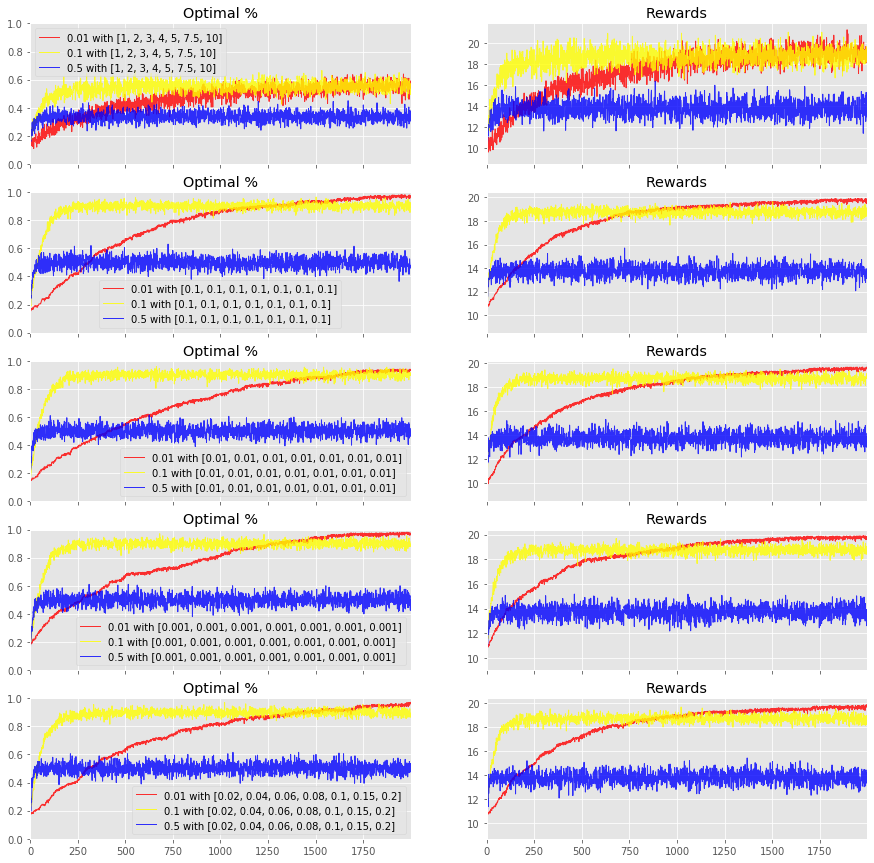

In [380]:
fig, ax = plt.subplots(nrows=len(sigmas_pkg), ncols=2, figsize=(15,15), sharex=True)
for i in range(len(sigmas_pkg)):
    for j, epsilon in enumerate(epsilons): 
        ep = str(epsilon)
        color = ['red', 'yellow', 'blue']
#         color = ['aquamarine', 'teal', 'deepskyblue', 'dodgerblue','powderblue']
        optimals_dict[ep][i].mean(axis=1).rolling(1).mean().plot(label=label_it(e_dict[ep][i]),
                            color=color[j], 
                            alpha=.8, 
                            lw=1, 
                            ax=ax[i][0]);
        ax[i][0].set_ylim(0,1)
#         color = ['firebrick', 'sienna', 'lightsalmon', 'tomato','red']
        df_dict[ep][i].mean(axis=1).rolling(1).mean().plot(label=label_it(e_dict[ep][i]),
                            color=color[j], 
                            alpha=.8, 
                            lw=1, 
                            ax=ax[i][1]);
        ax[i][0].legend()
        ax[i][1].set_title('Rewards');
        ax[i][0].set_title('Optimal %');

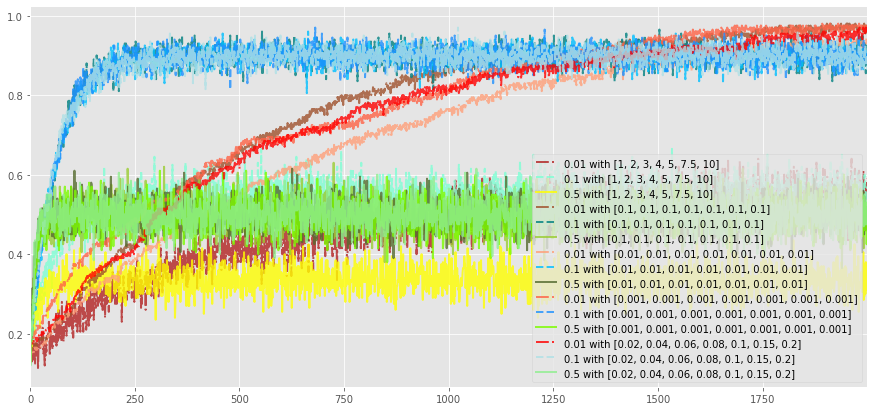

In [339]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(len(sigmas_pkg)): 
    for epsilon in epsilons: 
        ep = str(epsilon)
        linestyle = '--'
        color = ['aquamarine', 'teal', 'deepskyblue', 'dodgerblue','powderblue']
        if epsilon == .01: 
            linestyle = '-.'
            color = ['firebrick', 'sienna', 'lightsalmon', 'tomato','red']
        if epsilon == .5: 
            linestyle = '-'
            color = ['yellow', 'yellowgreen', 'darkolivegreen', 'lawngreen', 'lightgreen']
        optimals_dict[ep][i].mean(axis=1).plot(label=label_it(e_dict[ep][i]),
                                         color=color[i], 
                                         alpha=.8, 
                                         lw=2, 
                                         linestyle=linestyle)
ax.legend()